<a href="https://colab.research.google.com/github/udita1903/Computer-Vision/blob/main/FASHION_MNIST_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#getting the dataset
fashion=tf.keras.datasets.fashion_mnist
#get the training and testing data
(xtrain,ytrain),(xtest,ytest)=fashion.load_data()


4422102/4422102 [==============================] - 0s 0us/step


6
[[  0   0   0   0   0   0   0   0  68 135  81  29   0   5   0  36  77 155 164  82   4   0   0   0   1   0   1   0]
 [  0   0   0   0   0   0  99 203 176 186 187 217 215 221 187 255 138 177 189 163 200 111   5   0   2   0   0   0]
 [  0   0   1   0   0 168 187 167 161 163 157 151 170  33 115 158   0  95 172 152 164 176 144   2   0   2   0   0]
 [  0   0   0   0  90 185 168 158 168 165 160 162 177 138 171 194 172 188 156 170 160 156 175  97   0   3   0   0]
 [  2   3   0   0 178 172 170 167 166 164 154 159 163 179 163 157 150 158 160 166 161 160 159 165   8   0   2   0]
 [  0   3   0 101 192 174 173 165 166 168 156 163 158 159 167 162 161 161 154 163 167 173 159 176  97   0   3   0]
 [  1   0   0 193 178 184 168 156 171 162 157 163 158 162 170 158 157 159 155 170 159 170 170 170 184   0   0   1]
 [  1   0  53 189 167 194 180 153 183 164 161 156 166 163 163 159 156 158 161 162 160 170 176 158 181  40   0   1]
 [  3   0 143 192 172 182 183 151 173 168 164 158 159 160 164 163 160 160 156 

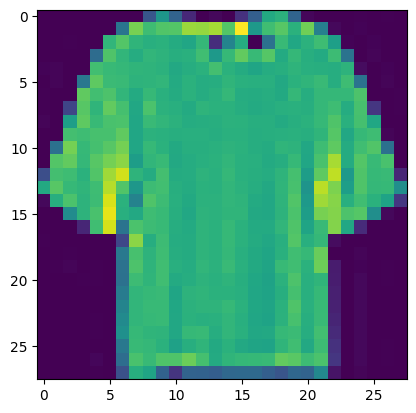

In [ ]:
#check the data once and see how it is
index=77

np.set_printoptions(linewidth=350)
print(ytrain[index])#prints the label of the data
print(xtrain[index])

plt.imshow(xtrain[index])

In [ ]:
#normalize the data
xtrain=xtrain/255.0
xtest=xtest/255.0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):


    # Check the loss
    if(logs.get('accuracy') >98):

      # Stop if threshold is met
      print("\n Training stopped beacuse there is no significant increase in accuracy after 98 percent")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
#building the model and adding convolutional layers
model=tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                           tf.keras.layers.MaxPooling2D(2,2),

                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),

                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=20,callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4605 - accuracy: 0.8341
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3170 - accuracy: 0.8843
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2743 - accuracy: 0.8983
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2464 - accuracy: 0.9074
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2212 - accuracy: 0.9171
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2008 - accuracy: 0.9244
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1836 - accuracy: 0.9310
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1675 - accuracy: 0.9367
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1508 - accuracy: 0.9425
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.133

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.4188 - accuracy: 0.9114


[0.4187593162059784, 0.9114000201225281]

In [ ]:


print(ytrain[:50])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3 6 6 0 8 5 2 1 6 6 7 9 5 9 2 7 3 0 3]


In [ ]:
index=np.where(np.array(ytrain[:50]==6))[0]
print(index)
#the zero at the end gives just the array otherwise there is some weird extra deets that you dont need

[18 32 33 39 40]


1/1 [==============================] - 0s 18ms/step


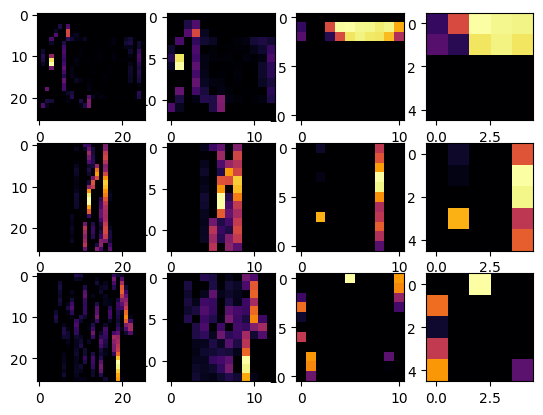

In [ ]:
from tensorflow.keras import models
#store layer outputs in a seprate variable and store the activation values in a seprate variable
layer_output=[layer.output for layer in model.layers]
activation_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)


f,ax=plt.subplots(3,4)
first=18
second=32
third=33
conv=1

#vizualizing only convolutinal layers and here are 4 of them
for x in range(0,4):
  f1=activation_model.predict(xtest[first].reshape(1,28,28,1))[x]
  ax[0,x].imshow(f1[0,:,:,conv],cmap='inferno')
  ax[0,x].grid(False)
  f2=activation_model.predict(xtest[second].reshape(1,28,28,1))[x]
  ax[1,x].imshow(f2[0,:,:,conv],cmap='inferno')
  ax[0,x].grid(False)
  f3=activation_model.predict(xtest[third].reshape(1,28,28,1))[x]
  ax[2,x].imshow(f3[0,:,:,conv],cmap='inferno')
  ax[0,x].grid(False)